# Traffic signs Lab

1) VGG like network

To do:
- data aug for smaller categories
- tensorboard info


## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

100%|██████████| 43/43 [00:00<00:00, 2942.65it/s]


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples 

       180 Speed limit (20km/h)
      1980 Speed limit (30km/h)
      2010 Speed limit (50km/h)
      1260 Speed limit (60km/h)
      1770 Speed limit (70km/h)
      1650 Speed limit (80km/h)
       360 End of speed limit (80km/h)
      1290 Speed limit (100km/h)
      1260 Speed limit (120km/h)
      1320 No passing
      1800 No passing for vehicles over 3.5 metric tons
      1170 Right-of-way at the next intersection
      1890 Priority road
      1920 Yield
       690 Stop
       540 No vehicles
       360 Vehicles over 3.5 metric tons prohibited
       990 No entry
      1080 General caution
       180 Dangerous curve to the left
       300 Dangerous curve to the right
       270 Double curve
       330 Bumpy road
       450 Slippery road
       240 Road narrows on the right
      1350 Road work
       540 Traffic signals
       210 Pedestrians
       480 Children 

max / min of train images 0 255


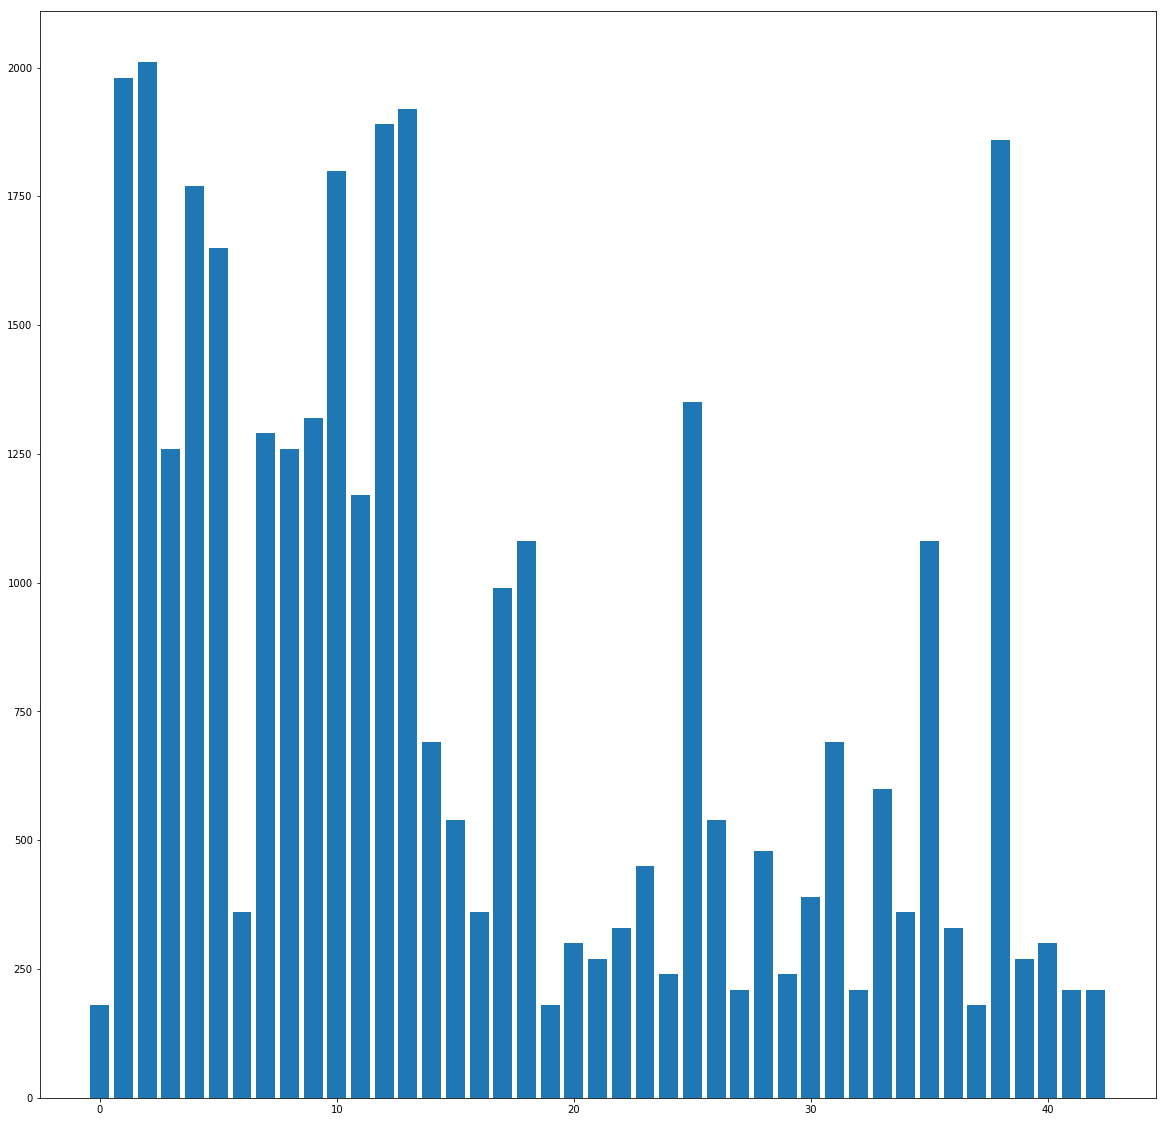

In [74]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tqdm import tqdm

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file='data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples \n".format(len(X_test)))

#checking numer of categories

categories, counts = np.unique(y_train, return_counts=True, axis=0)
x = pd.read_csv('signnames.csv')

for i in tqdm(range(len(counts))):
    print ('%10s' % counts[i], x.iloc[i][1])

print ('\n')
plt.figure(figsize=(20,20))
plt.bar(categories,counts)


print("Training set categories", len(categories))

#check value image range
print("max / min of train images", np.min(X_train), np.max(X_train))


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

8


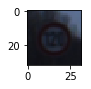

In [75]:
import random


index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

## Preprocess Data

Shuffle the training data.

Basic normalization

In [76]:
from sklearn.utils import shuffle


X_train, y_train = shuffle(X_train, y_train)

X_train = np.float32(X_train)
X_valid = np.float32(X_valid)
X_test = np.float32(X_test)

print ("raw data")
print("max / min of train images", np.min(X_train), np.max(X_train))
print("max / min of train images", np.min(X_valid), np.max(X_valid))
print("max / min of train images", np.min(X_test), np.max(X_test))


X_train = (X_train / 255.0) - 0.5
X_valid = (X_valid / 255.0) - 0.5
X_test = (X_test / 255.0) - 0.5

print ("norm / 255 - 0.5")
print("max / min of train images", np.min(X_train), np.max(X_train))
print("max / min of train images", np.min(X_valid), np.max(X_valid))
print("max / min of train images", np.min(X_test), np.max(X_test))


raw data
max / min of train images 0.0 255.0
max / min of train images 0.0 255.0
max / min of train images 0.0 255.0
norm / 255 - 0.5
max / min of train images -0.5 0.5
max / min of train images -0.5 0.5
max / min of train images -0.5 0.5


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [77]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

In [78]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    filters = tf.Variable(tf.truncated_normal([5,5,3,64], mean=mu, stddev=sigma))
    bias1 = tf.Variable(tf.zeros(64))
    strides = [1,1,1,1]
    padding = 'SAME'
    
    conv1 = tf.nn.conv2d(x,filters,strides,padding) + bias1
   
    # TODO: Activation.
    act1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # pool1 = tf.nn.max_pool(act1,ksize=[1,2,2,1],strides=[1,2,2,1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    filters2 = tf.Variable(tf.truncated_normal([5,5,64,64], mean=mu, stddev=sigma))
    strides2 = [1,1,1,1]
    bias2 = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(conv1,filters2,strides2,padding='SAME') + bias2
    act2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    
    pool1 = tf.nn.max_pool(act2,ksize=[1,2,2,1],strides=[1,2,2,1], padding='SAME')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    filters3 = tf.Variable(tf.truncated_normal([5,5,64,128], mean=mu, stddev=sigma))
    strides3 = [1,1,1,1]
    bias3 = tf.Variable(tf.zeros(128))
    conv3 = tf.nn.conv2d(pool1,filters3,strides3,padding='SAME') + bias3   
    act3 = tf.nn.relu(conv3)
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    filters4 = tf.Variable(tf.truncated_normal([5,5,128,128], mean=mu, stddev=sigma))
    strides4 = [1,1,1,1]
    bias4 = tf.Variable(tf.zeros(128))
    conv4 = tf.nn.conv2d(conv3,filters4,strides4,padding='SAME') + bias4
    act4 = tf.nn.relu(conv4)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    pool2 = tf.nn.max_pool(act4,ksize=[1,2,2,1],strides=[1,2,2,1], padding='SAME')
    
    flatten_layer = flatten(pool2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    
    ff1_weights = tf.Variable(tf.truncated_normal([8192,120], mean=mu, stddev=sigma))
    ff1_bias = tf.Variable(tf.zeros(120))
    
    ff1 = tf.matmul(flatten_layer,ff1_weights) + ff1_bias
    
    # TODO: Activation.
    
    act3 = tf.nn.relu(ff1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    ff2_weights = tf.Variable(tf.truncated_normal([120,84], mean=mu, stddev=sigma))
    ff2_bias = tf.Variable(tf.zeros(84))
    ff2 = tf.matmul (act3, ff2_weights) + ff2_bias
    # TODO: Activation.
    
    act4 = tf.nn.relu(ff2)

    
    dropout = tf.layers.dropout(act4, rate=0.7)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    
    log_weights = tf.Variable(tf.truncated_normal([84,43], mean=mu, stddev=sigma))
    log_bias = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dropout,log_weights) + log_bias
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [79]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [80]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [81]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [82]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...



100%|██████████| 35/35 [00:00<00:00, 58.10it/s]


EPOCH 1 ...
Validation Accuracy = 0.643



100%|██████████| 35/35 [00:00<00:00, 67.21it/s]


EPOCH 2 ...
Validation Accuracy = 0.790



100%|██████████| 35/35 [00:00<00:00, 67.42it/s]


EPOCH 3 ...
Validation Accuracy = 0.846



100%|██████████| 35/35 [00:00<00:00, 68.30it/s]


EPOCH 4 ...
Validation Accuracy = 0.838



100%|██████████| 35/35 [00:00<00:00, 67.49it/s]


EPOCH 5 ...
Validation Accuracy = 0.843



100%|██████████| 35/35 [00:00<00:00, 66.87it/s]


EPOCH 6 ...
Validation Accuracy = 0.878



100%|██████████| 35/35 [00:00<00:00, 67.91it/s]


EPOCH 7 ...
Validation Accuracy = 0.869



100%|██████████| 35/35 [00:00<00:00, 67.31it/s]


EPOCH 8 ...
Validation Accuracy = 0.896



100%|██████████| 35/35 [00:00<00:00, 68.00it/s]


EPOCH 9 ...
Validation Accuracy = 0.885



100%|██████████| 35/35 [00:00<00:00, 66.95it/s]


EPOCH 10 ...
Validation Accuracy = 0.903



100%|██████████| 35/35 [00:00<00:00, 67.35it/s]


EPOCH 11 ...
Validation Accuracy = 0.889



100%|██████████| 35/35 [00:00<00:00, 66.85it/s]


EPOCH 12 ...
Validation Accuracy = 0.875



100%|██████████| 35/35 [00:00<00:00, 67.80it/s]


EPOCH 13 ...
Validation Accuracy = 0.907



100%|██████████| 35/35 [00:00<00:00, 68.19it/s]


EPOCH 14 ...
Validation Accuracy = 0.901



100%|██████████| 35/35 [00:00<00:00, 67.32it/s]


EPOCH 15 ...
Validation Accuracy = 0.927



100%|██████████| 35/35 [00:00<00:00, 67.41it/s]


EPOCH 16 ...
Validation Accuracy = 0.914



100%|██████████| 35/35 [00:00<00:00, 67.64it/s]


EPOCH 17 ...
Validation Accuracy = 0.919



100%|██████████| 35/35 [00:00<00:00, 68.23it/s]


EPOCH 18 ...
Validation Accuracy = 0.919



100%|██████████| 35/35 [00:00<00:00, 68.24it/s]


EPOCH 19 ...
Validation Accuracy = 0.935



100%|██████████| 35/35 [00:00<00:00, 67.67it/s]


EPOCH 20 ...
Validation Accuracy = 0.946

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [83]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet


100%|██████████| 99/99 [00:01<00:00, 61.66it/s]

Test Accuracy = 0.941
